# Linear Regression Analysis

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
#from sklearn import svm


In [53]:
col_names = ['Code','Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN','Femur_Car_PN','Tibia_M_Car_PN','Tibia_L_Car_PN','Patella_volume','Femur_volume','Tibia_volume','Patella_Car_volume','Femur_Car_volume','Tibia_M_Car_volume','Tibia_L_Car_volume','Patella_bounds_x','Femur_bounds_x','Tibia_bounds_x','Patella_Car_bounds_x','Femur_Car_bounds_x','Tibia_M_Car_bounds_x','Tibia_L_Car_bounds_x','Patella_bounds_y','Femur_bounds_y','Tibia_bounds_y','Patella_Car_bounds_y','Femur_Car_bounds_y','Tibia_M_Car_bounds_y','Tibia_L_Car_bounds_y','Patella_bounds_z','Femur_bounds_z','Tibia_bounds_z','Patella_Car_bounds_z','Femur_Car_bounds_z','Tibia_M_Car_bounds_z','Tibia_L_Car_bounds_z','Max_dist_femur_tibia_lat_car','Min_dist_femur_tibia_lat_car','Mean_dist_femur_tibia_lat_car','Max_dist_femur_tibia_med_car','Min_dist_femur_tibia_med_car','Mean_dist_femur_tibia_med_car','Max_tib_lat_contact_pressure','Max_tib_med_contact_pressure']

file_path = "C:\\Users\\steph\\Documents\\GitHub\\f22-ai-cbl\\data\\processed\\set_2\\out.csv"
data = pd.read_csv(file_path, header=None, names=col_names, skiprows=[0])
df = pd.DataFrame(data, columns = col_names)

### Feature Engineering

In [6]:
L1 = []
L2 = []
for x in df['Max_tib_lat_contact_pressure']:
    if x < 20:
        L1.append(0)
    elif x < 25:
        L1.append(1)
    else:
        L1.append(2)
for x in df['Max_tib_med_contact_pressure']:
    if x < 20:
        L2.append(0)
    elif x < 25:
        L2.append(1)
    else:
        L2.append(2)
df['L1'] = L1
df['L2'] = L2

In [7]:
print(df.shape)
df.head()

(28, 46)


,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Patella_volume,Femur_volume,...,Max_dist_femur_tibia_lat_car,Min_dist_femur_tibia_lat_car,Mean_dist_femur_tibia_lat_car,Max_dist_femur_tibia_med_car,Min_dist_femur_tibia_med_car,Mean_dist_femur_tibia_med_car,Max_tib_lat_contact_pressure,Max_tib_med_contact_pressure,L1,L2
0,9905863M00,923,4011,3009,4745,19095,2840,2840,28699.200017,229006.314467,...,17.745715,2.039169,6.118655,12.363764,1.604390,4.737838,20.304403,21.124319,1,1
1,9905863M12,884,4110,2790,4585,19025,2840,2840,28197.827325,246641.112279,...,17.898652,1.921611,5.881292,11.342142,1.238408,4.577601,16.648224,24.434072,0,1
2,9908796M00,641,2861,2268,4120,20295,2840,2840,15222.439598,141352.763773,...,17.383859,1.526717,5.834900,11.786139,1.642169,4.761267,24.156282,32.353172,1,2
3,9908796M12,625,3022,2171,4715,19385,2840,2840,14931.893097,149215.886238,...,15.747611,1.651787,5.670845,9.728744,1.010164,4.052701,26.788031,41.688950,2,2
4,9912946M00,788,4137,2689,5575,21035,2840,2840,22692.085291,248976.459037,...,13.779237,1.205597,4.272830,20.666032,2.178122,6.670601,24.228903,16.497473,1,0


## Splitting data into train/test sets

### Removing features and printing out the accuracy rate with out them

In [19]:
## Feature columns for x values
feature_cols = ['Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN','Femur_Car_PN','Tibia_M_Car_PN','Tibia_L_Car_PN','Patella_volume','Femur_volume','Tibia_volume','Patella_Car_volume','Femur_Car_volume','Tibia_M_Car_volume','Tibia_L_Car_volume','Patella_bounds_x','Femur_bounds_x','Tibia_bounds_x','Patella_Car_bounds_x','Femur_Car_bounds_x','Tibia_M_Car_bounds_x','Tibia_L_Car_bounds_x','Patella_bounds_y','Femur_bounds_y','Tibia_bounds_y','Patella_Car_bounds_y','Femur_Car_bounds_y','Tibia_M_Car_bounds_y','Tibia_L_Car_bounds_y','Patella_bounds_z','Femur_bounds_z','Tibia_bounds_z','Patella_Car_bounds_z','Femur_Car_bounds_z','Tibia_M_Car_bounds_z','Tibia_L_Car_bounds_z','Max_dist_femur_tibia_lat_car','Min_dist_femur_tibia_lat_car','Mean_dist_femur_tibia_lat_car','Max_dist_femur_tibia_med_car','Min_dist_femur_tibia_med_car','Mean_dist_femur_tibia_med_car']
## Result columns for y values
#y_cols = ['Max_tib_lat_contact_pressure', 'Max_tib_med_contact_pressure']
y_cols = ['L2']
#y_cols = data[y_cols].values.ravel()
results = []
first_results = []

for i in feature_cols:    
    temp_features = feature_cols.copy()
    temp_features.remove(i)
    results1 = []
    for j in range(200):
        X = df[temp_features]
        y = df[y_cols]
        yy = [yi[0] for yi in y.values]
        xx = X.values
   # print(yy)
        results1.append(train_model(xx, yy))
    results.append(np.average(results1))
    
print(results)
#print(first_results)



[0.3396428571428571, 0.3492857142857143, 0.34642857142857136, 0.34535714285714286, 0.35285714285714276, 0.34892857142857137, 0.34285714285714286, 0.3467857142857143, 0.3453571428571429, 0.3367857142857143, 0.34107142857142847, 0.3546428571428571, 0.34892857142857137, 0.3457142857142857, 0.3564285714285714, 0.3467857142857143, 0.34642857142857136, 0.3414285714285714, 0.34964285714285714, 0.35535714285714287, 0.34678571428571425, 0.3507142857142857, 0.3446428571428571, 0.3389285714285714, 0.3389285714285714, 0.34892857142857137, 0.3446428571428571, 0.3389285714285714, 0.3407142857142857, 0.34892857142857137, 0.3467857142857143, 0.34214285714285714, 0.34, 0.3596428571428571, 0.33785714285714286, 0.34392857142857136, 0.3435714285714285, 0.3332142857142857, 0.3332142857142857, 0.3467857142857143, 0.3557142857142857]


In [12]:
## Feature columns for x values
#feature_cols = ['Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN','Femur_Car_PN','Tibia_M_Car_PN','Tibia_L_Car_PN','Patella_volume','Femur_volume','Tibia_volume','Patella_Car_volume','Femur_Car_volume','Tibia_M_Car_volume','Tibia_L_Car_volume','Patella_bounds_x','Femur_bounds_x','Tibia_bounds_x','Patella_Car_bounds_x','Femur_Car_bounds_x','Tibia_M_Car_bounds_x','Tibia_L_Car_bounds_x','Patella_bounds_y','Femur_bounds_y','Tibia_bounds_y','Patella_Car_bounds_y','Femur_Car_bounds_y','Tibia_M_Car_bounds_y','Tibia_L_Car_bounds_y','Patella_bounds_z','Femur_bounds_z','Tibia_bounds_z','Patella_Car_bounds_z','Femur_Car_bounds_z','Tibia_M_Car_bounds_z','Tibia_L_Car_bounds_z','Max_dist_femur_tibia_lat_car','Min_dist_femur_tibia_lat_car','Mean_dist_femur_tibia_lat_car','Max_dist_femur_tibia_med_car','Min_dist_femur_tibia_med_car','Mean_dist_femur_tibia_med_car']
## Result columns for y values
#y_cols = ['Max_tib_lat_contact_pressure', 'Max_tib_med_contact_pressure']




## Folding train-test split lines 11 - 12
def train_model(X, y):
     
    #print("%d %d" % (len(X_train),len(X_test)))
    
    #model = GaussianNB()
    model = BernoulliNB()
    #model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)
    #print("Accuracy: %.2f%%" % (result*100.0))


### Bagging

In [72]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
  
arr = data.values

X = arr[:, 1:26]
Y = arr[:,27]

seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = None)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X, Y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
nan


C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\ensemble\_bagging.py", line 292, in _fit
    y = self._validate_y(y)
  File "C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\ensemble\_bagging.py", line 653, in _validate_y
    check_classification_targets(y)
  File "C:\Users\steph\anaconda3.9\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets

### Boosting

In [46]:
#y_train = data['Max_tib_lat_contact_pressure']
#y_train = data['Max_tib_med_contact_pressure']
#data.drop(labels='Max_tib_med_contact_pressure', axis=1, inplace=True)
#data.drop(labels='Max_tib_lat_contact_pressure', axis=1, inplace=True)
data.drop(labels='Code', axis=1, inplace=True)

In [47]:
full_data = data.append(data)

In [48]:
X_train = full_data.values[2:15]
X_test = full_data.values[15:]

In [49]:
print(X_test)

[[6.18000000e+02 3.11900000e+03 2.19500000e+03 ... 1.12611759e+01
  1.44828273e+00 4.37071187e+00]
 [7.76000000e+02 3.80900000e+03 2.46700000e+03 ... 1.81382744e+01
  3.24368614e+00 7.20889880e+00]
 [7.86000000e+02 3.98800000e+03 2.33000000e+03 ... 1.72741778e+01
  3.31879122e+00 7.17167988e+00]
 ...
 [8.01000000e+02 3.80500000e+03 2.57500000e+03 ... 1.25613781e+01
  2.24690994e+00 4.47138742e+00]
 [8.68000000e+02 3.79400000e+03 3.02900000e+03 ... 1.62677290e+01
  1.75970582e+00 5.52514579e+00]
 [8.73000000e+02 3.92100000e+03 2.83100000e+03 ... 1.59431995e+01
  2.83373618e+00 6.48220913e+00]]


In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

ValueError: Found input variables with inconsistent numbers of samples: [13, 28]

### Evaluations

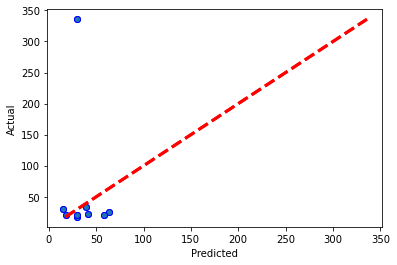

In [9]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [10]:
from sklearn import metrics

# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 49.5872219017597
MSE is 10848.146074311284
R2 score is -0.12473858715461028
